In [162]:
import torch
import torchvision.transforms as T 
from Model.model import Combined_Model
from PIL import Image 
import matplotlib.pyplot as plt 
from dotenv import load_dotenv
import os
import numpy as np 
import random

In [163]:
#Load Model
device=torch.device("cpu")
model=Combined_Model().to(device=device)

#Eval mode
model.eval()
model.load_state_dict(torch.load("./weights/complete/run_1/model140.pth"))

<All keys matched successfully>

In [165]:
load_dotenv(".env")

trainX_path = os.getenv("TRAIN_X_PATH")
trainY_path = os.getenv("TRAIN_Y_PATH")


xpaths = sorted(os.listdir(trainX_path))
ypaths = sorted(os.listdir(trainY_path))

# remove '_' in filenames
xps, yps = list(), list()
for i in xpaths:
    if '_' not in i:
        xps.append(i)

for i in ypaths:
    if '_' not in i:
        yps.append(i)
xps, yps = sorted(xps), sorted(yps)

In [166]:
#select an image pair at random
label=random.choice(xps)
img_x=Image.open(trainX_path+label)
img_y=Image.open(trainY_path+label)

transform=T.Compose([T.Resize((256,256)),T.ToTensor(),T.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

img_x_tensor=transform(img_y)

img_x_tensor=img_x_tensor.view(1,img_x_tensor.size(0),img_x_tensor.size(1),img_x_tensor.size(2))


In [167]:
#get outputs and post-process
prediction=model(img_x_tensor)
prediction_np=prediction.detach().numpy()
x=img_x_tensor.detach().numpy()

prediction_np=(np.round((prediction_np+1)*255)//2).astype(np.uint8)
x=(np.round((x+1)*255)//2).astype(np.uint8)
#Transpose to HXWXC shape
prediction_hwc=prediction_np.transpose(0,2,3,1)
x=x.transpose(0,2,3,1)


Text(0.5, 1.0, 'Predicted')

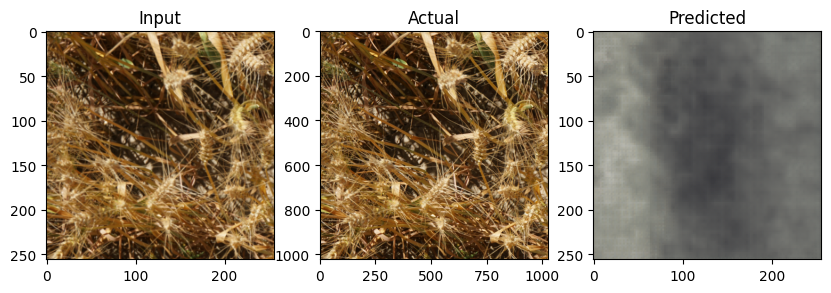

In [168]:
#Display
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,3,1)
ax1.imshow(x[0])
ax1.set_title("Input")

ax2=fig.add_subplot(1,3,2)
ax2.imshow(np.array(img_y))
ax2.set_title("Actual")

ax3=fig.add_subplot(1,3,3)
ax3.imshow(prediction_hwc[0])
ax3.set_title("Predicted")
